<a href="https://colab.research.google.com/github/manzajmm/Entregas/blob/main/trabajo_finalf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CREDIT LADER INTERNATIONAL***

# ***INTRODUCCIÓN***

Somos una empresa financiera que se dedica a otorgar créditos. Nuestra función es analizar el perfil del cliente, es decir, si cumple con los requisitos para recibir un crédito en base a sus caracterísiticas, las cuales desarrollaremos más adelante.

Credit Lader International está conformada por:

-Leandro Sueldo

-Sabrina Benvenuto

-Juan Martin Manzanares

-Luca Robledo

CLI nació a raíz de la pandemia del 2020 para brindar sustento a aquellas personas cuyos ingresos disminuyeron debido al aislamiento o se encontraron desempleados, por lo cual optaron por solicitar un préstamo a nuestra compañía

# ***MODELO DATA SCIENCE***

Nuestro problema de negocio es identificar mediante la ejecución de un algoritmo si las personas solicitantes al crédito aplican o no al mismo según ciertos criterios. 

# ***DATA ACQUISITION***

La fuente original que utilizamos para el análisis lo obtuvimos a través de la página Kaggle. Podrá visualizarse por medio del siguiente link: https://docs.google.com/spreadsheets/d/1ozZ9RczhqHwxfolAMCTCmgC2Ft6QCsUu/edit?usp=sharing&ouid=108211289058967970465&rtpof=true&sd=true Es necesario aclarar que la misma fue modificada a lo largo del trabajo para facilitar nuestro análisis y amoldarla a nuestro objetivo.

Los variables que incluiremos en nuestro análisis son las siguientes:

*   CODE_GENDER = Género.
*   FLAG_OWN_CAR = Posee o no autómovil.
*   FLAG_OWN_REALTY = Posee o no propiedades.
*   CNT_CHILDREN = Cantidad de hijos.
*   AMT_INCOME_TOTAL = Ingresos anuales.
*   NAME_INCOME_TYPE = Tipo de ingreso.
*   NAME_EDUCATION_TYPE = Nivel de educación.
*   NAME_FAMILY_STATUS = Estado civil.
*   NAME_HOUSING_TYPE = Dónde vive.
*   DAYS_BIRTH = Cumpleaños. Cuenta hacia atrás desde el día actual (0), -1 significa ayer
*   DAYS_EMPLOYED = Días desde los que fue contratado. Cuenta hacia atrás desde el día actual (0). Si es positivo, significa que la persona actualmente está desempleada.
*   FLAG_MOBIL = Posee o no teléfono celular.
*   FLAG_WORK_PHONE = Posee o no teléfono laboral.
*   FLAG_PHONE = Posee o no teléfono.
*   FLAG_EMAIL = Posee o no e-mail.
*   OCCUPATION_TYPE = Ocupación.
*   CNT_FAM_MEMBERS = Tamaño de la familia.
*   STATUS = Estado de pago del crédito (0: pagó en término, 1: adeuda cuota)

Los datos anteriormente mencionados fueron recopilados a través de diferentes entrevistas realizadas a las personas que solicitaron el crédito. Consideramos que son relevantes para nuestro análisis porque nos permite identificar aquellos usuarios beneficiosos, cumplidores y de interés para CLI.

# ***DATA WRANGLING / EDA***

In [1]:
pip install pycaret --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 4.4 MB/s 
     |████████████████████████████████| 134 kB 48.0 MB/s 
     |████████████████████████████████| 1.7 MB 8.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 40.9 MB/s 
     |████████████████████████████████| 10.4 MB 31.1 MB/s 
     |████████████████████████████████| 17.0 MB 38.4 MB/s 
     |████████████████████████████████| 262 kB 57.8 MB/s 
     |████████████████████████████████| 167 kB 39.8 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 6.8 MB 49.0 MB/s 
     |████████████████████████████████| 88 kB 6.6 MB/s 
     |████████████████████████████████| 636 kB 35.0 MB/s 
     |████████████████████████████████| 

In [2]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [3]:
exit()

In [1]:
import jinja2
from pycaret.classification import *

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving credit_record.csv to credit_record.csv
Saving scoring.csv to scoring.csv


In [5]:
df1 = pd.read_csv("scoring.csv", sep=';')
df2 = pd.read_csv("credit_record.csv", sep=';',index_col=0)

In [6]:
df1.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


***Observamos los primeros diez registros del dataset.***

In [7]:
df1.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


**Conocemos los nombres de cada columna.**

In [8]:
df1.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

***Buscamos entender los distintos tipos de datos almacenados en el dataset y por columna.***

In [9]:
df1.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

***Con shape, conocemos el tamaño de nuestro conjunto de datos.***

In [10]:
df1.shape

(438557, 18)

***Cercioramos estar trabajando con un pandas DataFrame.***

In [11]:
type(df1)

pandas.core.frame.DataFrame

***Observamos la cantidad de registros por variable. Notamos un faltante de datos en la columna OCCUPATION_TYPE.***

In [12]:
df1.count()

ID                     438557
CODE_GENDER            438557
FLAG_OWN_CAR           438557
FLAG_OWN_REALTY        438557
CNT_CHILDREN           438557
AMT_INCOME_TOTAL       438557
NAME_INCOME_TYPE       438557
NAME_EDUCATION_TYPE    438557
NAME_FAMILY_STATUS     438557
NAME_HOUSING_TYPE      438557
DAYS_BIRTH             438557
DAYS_EMPLOYED          438557
FLAG_MOBIL             438557
FLAG_WORK_PHONE        438557
FLAG_PHONE             438557
FLAG_EMAIL             438557
OCCUPATION_TYPE        304354
CNT_FAM_MEMBERS        438557
dtype: int64

***Confirmamos la ausencia de datos con la funcion info.***

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Usamos una interfaz gráfica para detectar y elegir la columna a desechar por falta de datos

> Bloque con sangría



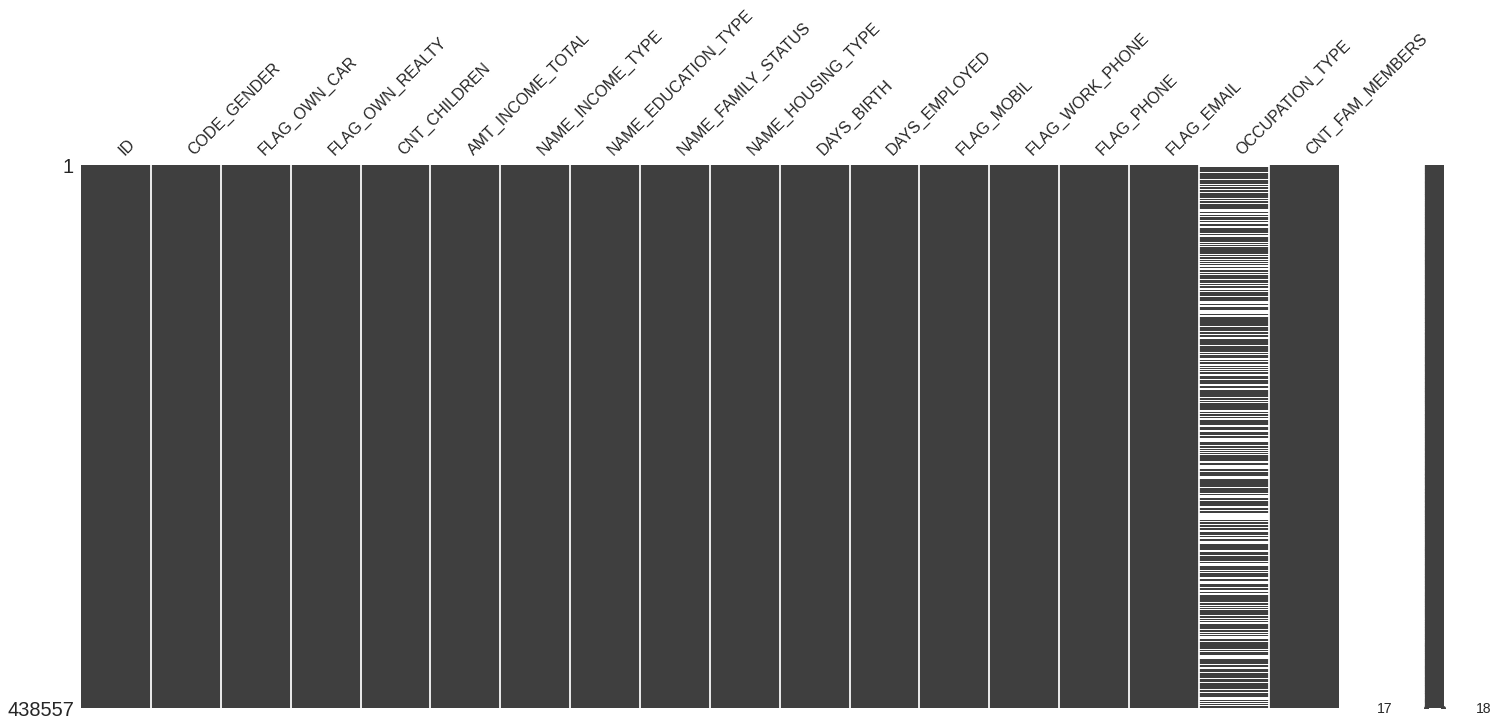

In [14]:
import missingno as msno

msno.matrix(df1)

***A continuacion decidimos seguir adelante sin la columna OCCUPATION_TYPE en nuestro dataset.***

In [15]:
df1 = df1.drop(['OCCUPATION_TYPE'], axis=1)
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0


***Usamos la funcion describe, para poder obervar los datos estadisticos de las variables numericas***

In [16]:
df1['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [17]:
df1['NAME_INCOME_TYPE'].describe()

count      438557
unique          5
top       Working
freq       226104
Name: NAME_INCOME_TYPE, dtype: object

In [18]:
df1['NAME_INCOME_TYPE'].value_counts()

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

***Analizamos el DataFrame2***

In [19]:
df2.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [20]:
df2.dtypes

ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [21]:
df2.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [22]:
df2.count()

ID                1048575
MONTHS_BALANCE    1048575
STATUS            1048575
dtype: int64

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 32.0+ MB


Usamos describe sobre el 'STATUS' para describir cuántas categorías tenemos de forma única

In [24]:
df2['STATUS'].describe()

count     1048575
unique          8
top             C
freq       442031
Name: STATUS, dtype: object

Ahora pasaremos a observar cuantos valoers únicos hay en cada categoría

In [25]:
df2['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

***Unimos ambos DataFrames según ID***

In [26]:
merge1=df1.merge(df2, on=['ID'],how='inner')
merge1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-12,0


Usamos una interfaz gráfica para comprobar la integridad del dataset creado

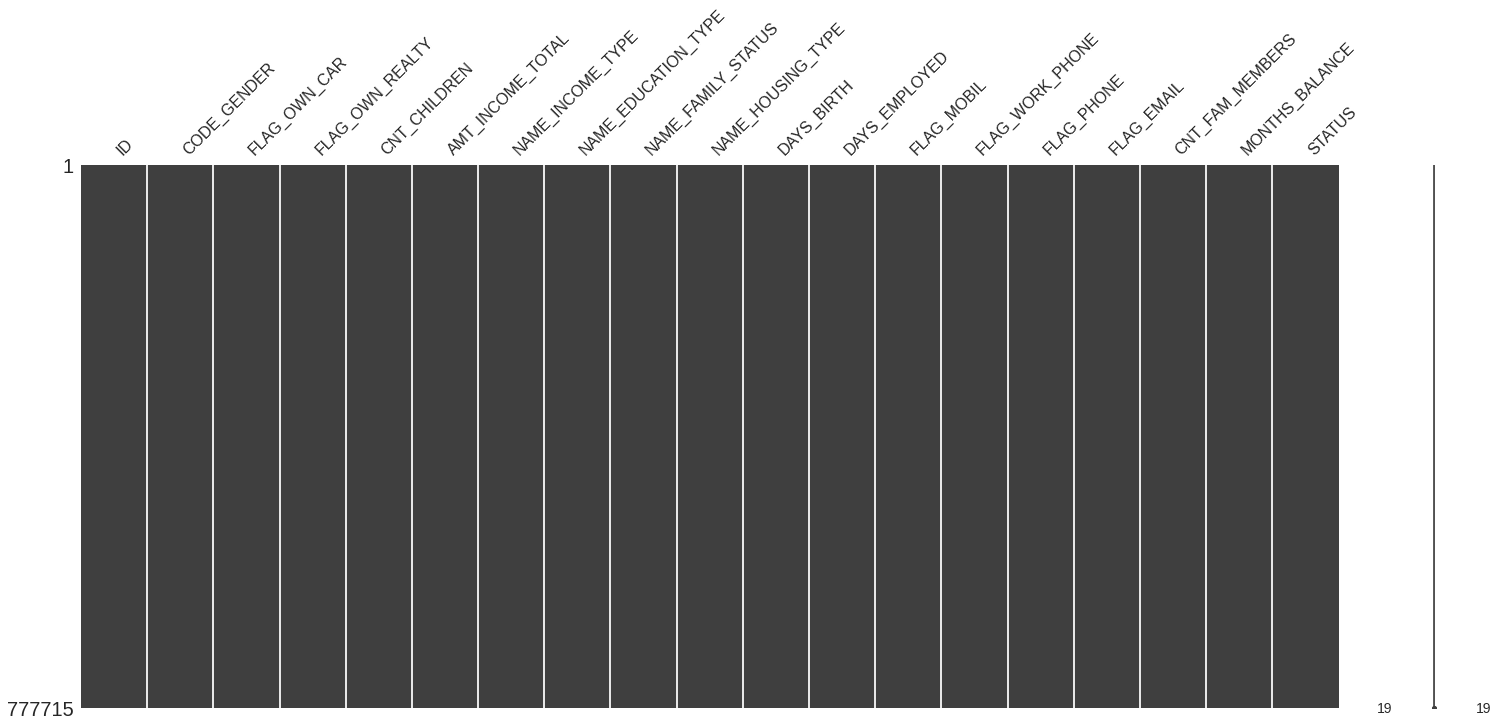

In [27]:
msno.matrix(merge1)

***Vamos a analizar cuantos datos terminan estando en ambos Dataframes (descartamos aquellos cuyo id no esta en ambas tablas por no tener valores coincidentes)***

In [28]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [29]:
merge1.shape

(777715, 19)

# ***ANÁLISIS BIVARIADO***

***En el siguiente gráfico buscamos conocer la relación existente entre el tipo de ocupación de las personas que solicitan el crédito con su nivel de ingreso.*** 

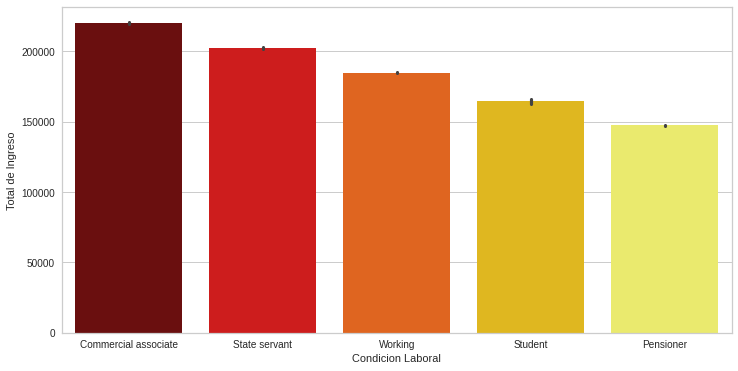

In [30]:
plt.figure(figsize=(12,6))
sns.barplot(x ='NAME_INCOME_TYPE', y = 'AMT_INCOME_TOTAL', data= merge1 ,palette='hot', order =['Commercial associate','State servant','Working','Student','Pensioner'])
plt.ylabel('Total de Ingreso')
plt.xlabel('Condicion Laboral')
plt.show()

***Observamos que los que se desempeñan como "Commercial Associate" tienen el mayor nivel de ingreso.***

***Por otro lado, queremos conocer la relación entre el sexo de la persona y su nivel de ingreso.***

Text(0.5, 0, 'Genero')

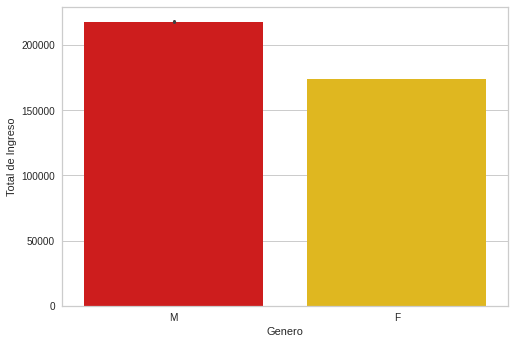

In [31]:

sns.barplot(x='CODE_GENDER', y= 'AMT_INCOME_TOTAL', data = merge1, palette='hot')
plt.ylabel('Total de Ingreso')
plt.xlabel('Genero')

***Según el gráfico, concluimos que el género masculino tiene un nivel de ingreso mayor que el femenino.***

***Graficamos las medidas de tendencia central de los distintos tipos de ocupaciones con los niveles de ingreso.***

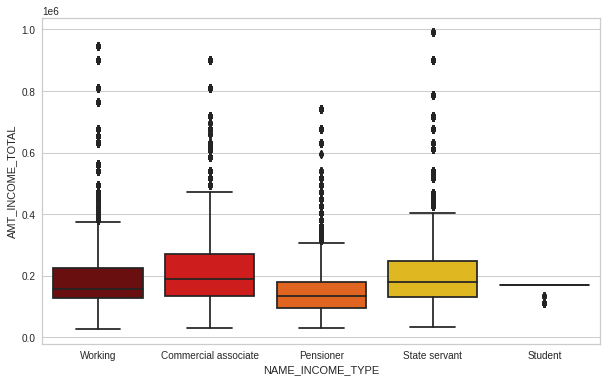

In [32]:
plt.figure(figsize=(10,6))
amt_2 = merge1['AMT_INCOME_TOTAL'] < 1000000
sns.boxplot(x="NAME_INCOME_TYPE", y="AMT_INCOME_TOTAL", data=merge1[amt_2], palette='hot')
plt.show()

***Queremos observar la relación existente entre el estado civil y el nivel de ingreso.***

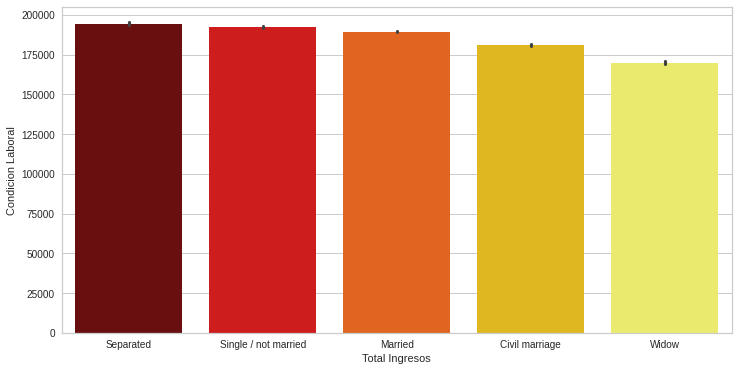

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x ='NAME_FAMILY_STATUS', y = 'AMT_INCOME_TOTAL', data= merge1, palette='hot',order =['Separated','Single / not married','Married','Civil marriage','Widow'])
plt.ylabel('Condicion Laboral')
plt.xlabel('Total Ingresos')
plt.show()

***Visualizamos que a rasgo general las personas con distintos estados civiles tienen un nivel de ingreso bastante similar.***

***Por último, nos interesa conocer el efecto que produce el nivel de estudio alcanzado con el ingreso.***

Text(0.5, 0, 'Nivel Educativo')

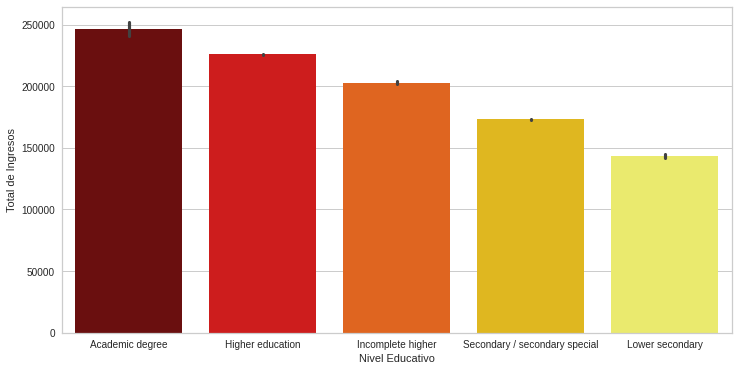

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x='NAME_EDUCATION_TYPE', y= 'AMT_INCOME_TOTAL', data = merge1,palette='hot', order =['Academic degree','Higher education','Incomplete higher','Secondary / secondary special','Lower secondary'])
plt.ylabel('Total de Ingresos')
plt.xlabel('Nivel Educativo')

***Como es de esperar, las personas con un título académico tienen mayor nivel de ingreso. En contraposición, los solicitantes al 
crédito con secundario incompleto, son los que poseen menor ingeso.***

# ***ANÁLISIS MULTIVARIADO***

***Analizamos el nivel de educacion alcanzado respecto al ingreso total y separamos en genero. Los hombres tienen mayores ingresos en todos los niveles académicos***

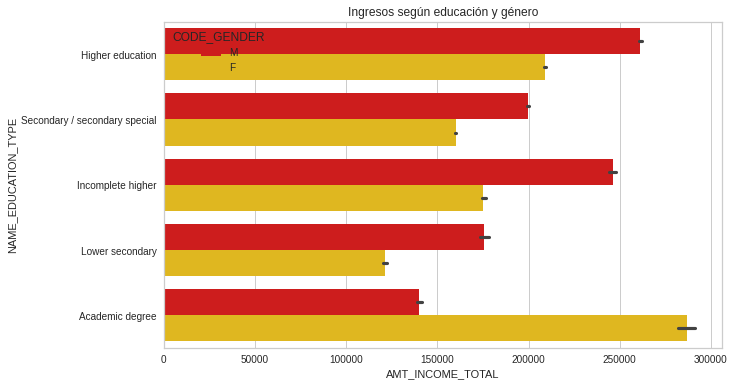

In [35]:
plt.figure(figsize=(10,6))
plt.title('Ingresos según educación y género')
sns.barplot(x='AMT_INCOME_TOTAL',y='NAME_EDUCATION_TYPE',hue='CODE_GENDER',data=merge1,palette='hot')
plt.show()

***En este caso, al comparar el nivel de educacion con el ingreso total y la posesion de bienes raices, nos damos cuenta que la mayoria de los clientes poseen al menos una propiedad.***

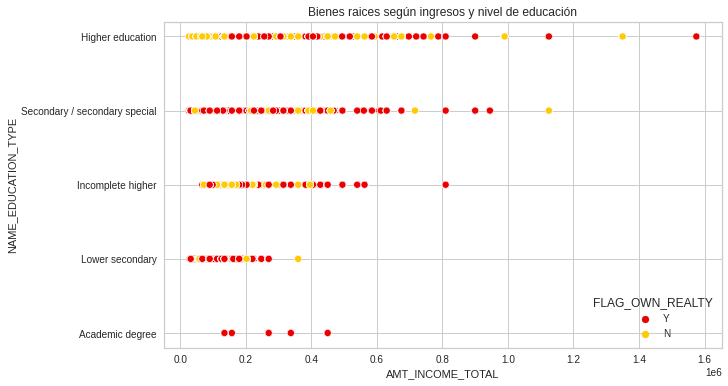

In [36]:
plt.figure(figsize=(10,6))
plt.title('Bienes raices según ingresos y nivel de educación')
sns.scatterplot(x='AMT_INCOME_TOTAL',y='NAME_EDUCATION_TYPE',hue='FLAG_OWN_REALTY',data=merge1, palette='hot')
plt.show()

***Analizamos y comparamos los tipos de ingreso por género***

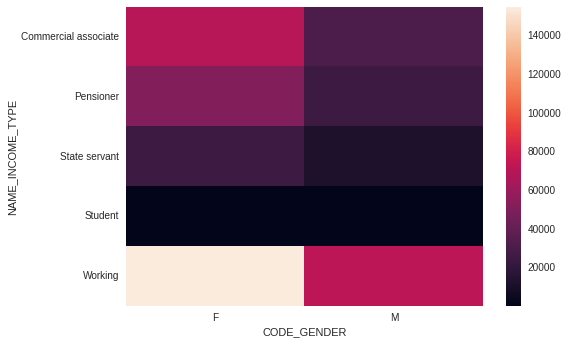

In [37]:
sns.heatmap(pd.crosstab(df1['NAME_INCOME_TYPE'],merge1['CODE_GENDER']))
plt.show()

***Con el siguiente grafico, notamos un mayor numero de clientes de genero femenino.***

Text(0.5, 0.98, 'Cantidad de clientes discriminado por género, ingresos y educacion')

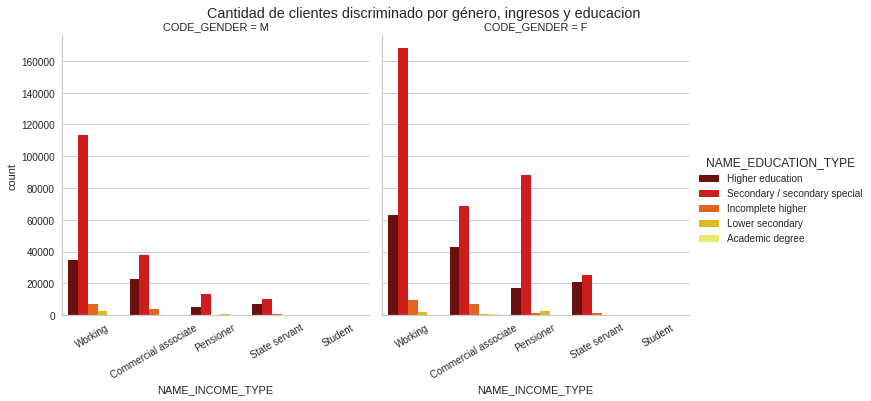

In [38]:
g = sns.catplot(x="NAME_INCOME_TYPE", hue="NAME_EDUCATION_TYPE", col="CODE_GENDER",
                data=merge1, kind="count", palette='hot');
g.set_xticklabels(rotation=30)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Cantidad de clientes discriminado por género, ingresos y educacion')

# ***DATASET FINAL***

In [39]:
merge1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,C


In [40]:
# Reemplazaremos la columna 'Status' con solo dos categorias segun las personas de C , X, 0 y 1 como no riesgosas o 0.
# Las personas de las restantes categorias como riesgosas o 1 (tienen créditos y presentan atrasos en ellos por mas de 60 dias, limite que consiremos a la persona como moroso)
def status(s):
    if s == "C":
        return 0
    elif s == "X":
        return 0
    elif s == '0':
        return 0
    elif s == '1':
        return 0
    elif s == '2':
        return 1
    elif s == '3':
        return 1
    elif s == '4':
        return 1
    elif s == '5':
        return 1
    
merge1['STATUS'] = merge1['STATUS'].apply(lambda x:status(x))

In [41]:
merge1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-10,1
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-11,0
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,1.0,-12,0


In [42]:
cat_vars= merge1.select_dtypes(include=['object']).columns

In [43]:
merge1[cat_vars] =merge1[cat_vars].astype('category')

In [44]:
merge1.dtypes


ID                        int64
CODE_GENDER            category
FLAG_OWN_CAR           category
FLAG_OWN_REALTY        category
CNT_CHILDREN              int64
AMT_INCOME_TOTAL        float64
NAME_INCOME_TYPE       category
NAME_EDUCATION_TYPE    category
NAME_FAMILY_STATUS     category
NAME_HOUSING_TYPE      category
DAYS_BIRTH                int64
DAYS_EMPLOYED             int64
FLAG_MOBIL                int64
FLAG_WORK_PHONE           int64
FLAG_PHONE                int64
FLAG_EMAIL                int64
CNT_FAM_MEMBERS         float64
MONTHS_BALANCE            int64
STATUS                    int64
dtype: object

In [45]:
merge1[cat_vars]= merge1[cat_vars].apply(lambda x:x.cat.codes)

Nuevas categorias numericas:
  
  
'CODE_GENDER'

*   0 = F  
*   1 = M 

'FLAG_OWN_CAR'

*   0 =  N 
*   1 =  Y

'FLAG_OWN_REALTY'


*   1 = Y 
*   0 = N


  'NAME_INCOME_TYPE'

*   0 = Commercial associate 
*   1 = Pensioner 
*   2 = State servant
*   3 = Student
*   4 = Working

'NAME_EDUCATION_TYPE'

*   0  = Academic degree 
*   1  = Higher education 
*   2  = Incomplete higher 
*   3  = Lower secondary 
*   4  = Secondary / secondary special 

'NAME_FAMILY_STATUS'


*   0 = Civil marriage
*   1 = Married
*   2 = Separate
*   3 = Single / not married
*   4 = Widow 

'NAME_HOUSING_TYPE'


*   0 = Co-op apartment
*   1 = House / apartment
*   2 = Municipal apartment
*   3 = Office apartment
*   4 = Rented apartment
*   5 = With parents






    


    











In [46]:
merge1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,0,0
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-1,0
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-2,0
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-3,0
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,1,0,1,0,112500.0,4,4,3,4,-9188,-1193,1,0,0,0,1.0,-9,0
777711,5150337,1,0,1,0,112500.0,4,4,3,4,-9188,-1193,1,0,0,0,1.0,-10,1
777712,5150337,1,0,1,0,112500.0,4,4,3,4,-9188,-1193,1,0,0,0,1.0,-11,0
777713,5150337,1,0,1,0,112500.0,4,4,3,4,-9188,-1193,1,0,0,0,1.0,-12,0


GENERANDO CATEGORIAS BINARIAS

Para un análisis más facil de leer generaremos categorias que simplifiquen la lectura

**Primero dividiremos a las personas entre personas ocupadas o no para medir su riesgo (0 = con empleo, 1= desempleado)**

In [47]:

def desempleados(x):
    if int(x) >= 30  :
        return 1
    else:
        return 0

merge1['UNEMPLOYED'] = merge1['DAYS_EMPLOYED'].apply(lambda x:desempleados(x))

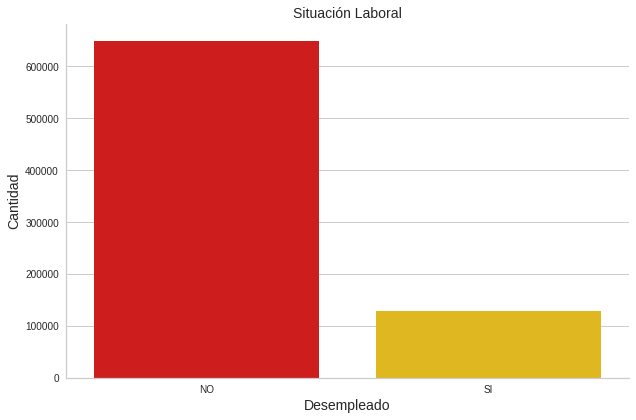

In [48]:
gdesempleados = sns.catplot( x='UNEMPLOYED',
             kind="count", 
             data=merge1,
             height=6,
             aspect=1.5, palette='hot')
gdesempleados.set_xticklabels(["NO", "SI"])
plt.xlabel("Desempleado", size=14)
plt.ylabel("Cantidad", size=14)
plt.title("Situación Laboral", size=14)
plt.tight_layout()

**Pasaremos a convertir en binaria tmb la categoria de un ingreso minimo como no riesgoso, en este caso sera de usd 50.000 anuales (0 = ingresos menores al límite y 1= ingresos superiores a u$d 50.00** 

In [49]:


def renta(x,y):
    renta = x
    miembros = y
    if (renta / miembros) >= 50000:
        return 1
    else:
        return 0
    
merge1['RENTA_MINIMA'] = merge1[['AMT_INCOME_TOTAL','CNT_FAM_MEMBERS']].apply(lambda x:renta (*x), axis=1)




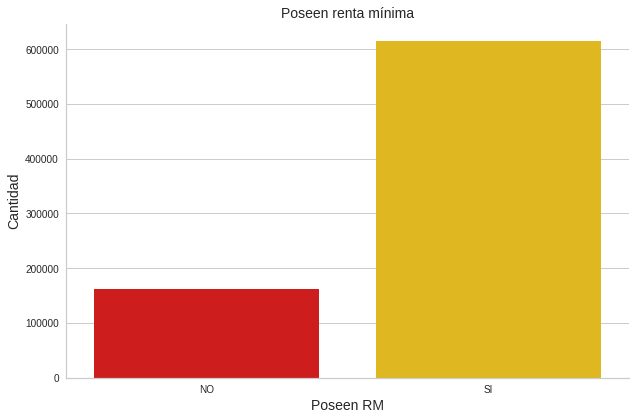

In [50]:
grentaminima = sns.catplot( x='RENTA_MINIMA',
             kind="count", 
             data=merge1,
             height=6,
             aspect=1.5, palette='hot')
grentaminima.set_xticklabels(["NO", "SI"])
plt.xlabel("Poseen RM", size=14)
plt.ylabel("Cantidad", size=14)
plt.title("Poseen renta mínima", size=14)
plt.tight_layout()

In [51]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  int8   
 2   FLAG_OWN_CAR         777715 non-null  int8   
 3   FLAG_OWN_REALTY      777715 non-null  int8   
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  int8   
 7   NAME_EDUCATION_TYPE  777715 non-null  int8   
 8   NAME_FAMILY_STATUS   777715 non-null  int8   
 9   NAME_HOUSING_TYPE    777715 non-null  int8   
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

**GENERAREMOS UNA REGLA DE APROBACION DE TARJETAS DE CREDITO. (1 = tiene empleo, ingresos y no es moroso, 0 = no reune todas las cualidades)**

In [52]:


def aprovado(e, s, r):
    # perfil buscado: clientes con trabajo, sin morosidad mayor a 60 dias e con renta mínima anual de u$d 50.000,00 per capita por família. 
    if e == 0 and s == 0 and r == 1:
        return 1
    else:
        return 0
    
merge1['APROBADO'] = merge1[['UNEMPLOYED', 'STATUS', 'RENTA_MINIMA']].apply(lambda x:aprovado(*x), axis=1)

In [53]:
merge1['APROBADO'].value_counts()

1    513110
0    264605
Name: APROBADO, dtype: int64

ALGORITMOS DE CLASIFICAIÓN


In [54]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test, y_train, y_test = train_test_split( merge1[['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','AMT_INCOME_TOTAL','DAYS_EMPLOYED','MONTHS_BALANCE',
                                                         'UNEMPLOYED','STATUS','RENTA_MINIMA']], merge1['APROBADO'],test_size=0.20,random_state=9)

In [55]:
merge1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,UNEMPLOYED,RENTA_MINIMA,APROBADO
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,0,0,0,1,1
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-1,0,0,1,1
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-2,0,0,1,1
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-3,0,0,1,1
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-4,0,0,1,1


Se pasaran a eliminar las categorias que no ayuden a un analisis, y que ralentizen los modelos

In [56]:

merge1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,UNEMPLOYED,RENTA_MINIMA,APROBADO
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,0,0,0,1,1
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-1,0,0,1,1
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-2,0,0,1,1
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-3,0,0,1,1
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,2.0,-4,0,0,1,1


In [57]:
merge1 = merge1.drop(['CNT_FAM_MEMBERS','CNT_CHILDREN','NAME_FAMILY_STATUS','FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL','CNT_FAM_MEMBERS','ID'], axis=1)
merge1.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,MONTHS_BALANCE,STATUS,UNEMPLOYED,RENTA_MINIMA,APROBADO
0,1,1,1,427500.0,4,1,4,-12005,-4542,0,0,0,1,1
1,1,1,1,427500.0,4,1,4,-12005,-4542,-1,0,0,1,1
2,1,1,1,427500.0,4,1,4,-12005,-4542,-2,0,0,1,1
3,1,1,1,427500.0,4,1,4,-12005,-4542,-3,0,0,1,1
4,1,1,1,427500.0,4,1,4,-12005,-4542,-4,0,0,1,1


In [58]:
experimento = setup(merge1,target='APROBADO')

,Description,Value
0,session_id,525
1,Target,APROBADO
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(777715, 14)"
5,Missing Values,False
6,Numeric Features,10
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='APROBADO',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [59]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8510,0.9127,0.9796,0.8266,0.8966,0.6366,0.6668
1,0.8501,0.9158,0.9762,0.8276,0.8958,0.6355,0.6637
2,0.8507,0.9134,0.9795,0.8263,0.8964,0.6358,0.6661
3,0.8904,0.9452,0.9553,0.8873,0.9200,0.7469,0.7521
4,0.8523,0.9190,0.9769,0.8295,0.8972,0.6412,0.6689
5,0.8515,0.9175,0.9749,0.8298,0.8965,0.6397,0.6664
6,0.8515,0.9128,0.9804,0.8267,0.8970,0.6376,0.6683
7,0.8525,0.9179,0.9757,0.8304,0.8972,0.6421,0.6689
8,0.8493,0.9153,0.9737,0.8281,0.8950,0.6342,0.6609


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=525, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


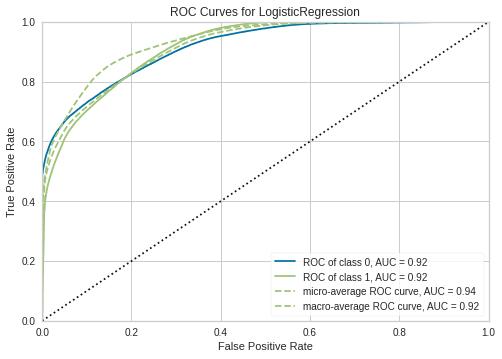

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [60]:
plot_model (lr, plot= 'auc')

In [61]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8143,0.8581,0.9826,0.7882,0.8747,0.5323,0.5835
1,0.8136,0.8585,0.9827,0.7875,0.8743,0.5304,0.5821
2,0.8139,0.8583,0.9827,0.7877,0.8745,0.5311,0.5826
3,0.8180,0.8626,0.9841,0.7910,0.8771,0.5422,0.5931
4,0.8152,0.8624,0.9840,0.7884,0.8754,0.5342,0.5864
5,0.8163,0.8617,0.9838,0.7895,0.8760,0.5374,0.5888
6,0.8147,0.8607,0.9841,0.7879,0.8751,0.5328,0.5853
7,0.8159,0.8631,0.9829,0.7895,0.8757,0.5367,0.5874
8,0.8152,0.8617,0.9835,0.7886,0.8753,0.5344,0.5862


INFO:logs:create_model_container: 2
INFO:logs:master_model_container: 2
INFO:logs:display_container: 3
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:create_model() succesfully completed......................................


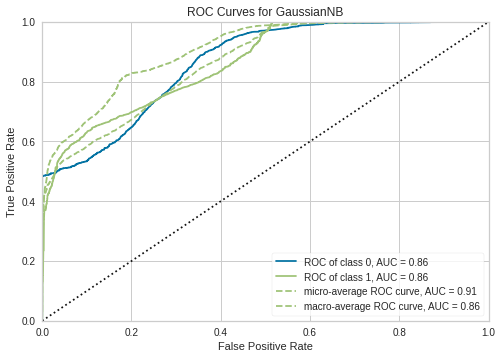

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [62]:
plot_model (nb, plot= 'auc')

In [63]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0


INFO:logs:create_model_container: 3
INFO:logs:master_model_container: 3
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=525, splitter='best')
INFO:logs:create_model() succesfully completed......................................


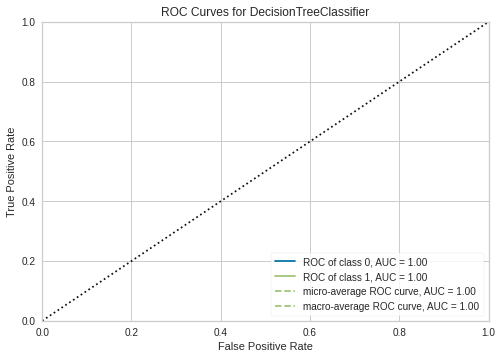

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [64]:
plot_model (dt, plot= 'auc')

Analizando los tres modelos creados, consideramos optimo usar el de linear regression, debido a que nos parece el indicado por sus altos valores de optimizacion.


Pasamos entonces a optimizar el modelo


In [65]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9976,0.9937,1.0000,0.9963,0.9982,0.9946,0.9946
1,0.8587,0.9393,0.8761,0.9066,0.8911,0.6902,0.6910
2,0.8303,0.9065,0.8895,0.8584,0.8737,0.6156,0.6165
3,0.8289,0.9032,0.8947,0.8531,0.8734,0.6101,0.6117
4,0.8333,0.9061,0.9001,0.8549,0.8769,0.6193,0.6213
5,0.8288,0.9078,0.8868,0.8584,0.8724,0.6127,0.6135
6,0.8289,0.9054,0.8883,0.8575,0.8726,0.6124,0.6133
7,0.9848,0.9952,0.9836,0.9932,0.9884,0.9662,0.9663
8,0.9974,0.9935,1.0000,0.9961,0.9980,0.9942,0.9942


INFO:logs:create_model_container: 4
INFO:logs:master_model_container: 4
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=7.116000000000001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=525, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


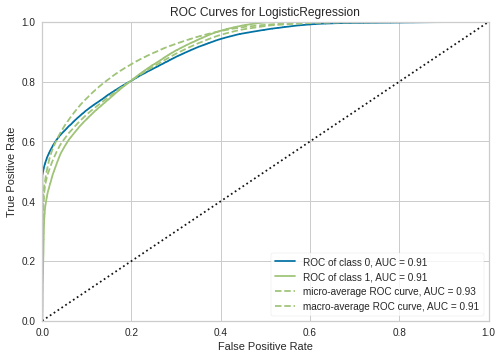

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [66]:
plot_model (tuned_lr, plot= 'auc')

In [67]:
final_lr = finalize_model(tuned_lr)

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LogisticRegression(C=7.116000000000001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=525, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LogisticRegression(C=7.116000000000001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=525, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LogisticRegression(C=7.1

In [68]:
save_model(tuned_lr, 'modelo_lr_17_08_22')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=LogisticRegression(C=7.116000000000001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=525, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), model_name=modelo_lr_17_08_22, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='APROBADO',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
  

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='APROBADO',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=7.116000000000001,
                                  